# Contributors to California Civic Data Coalition repositories

By Ben Welsh

This analysis is drawn from the open-source list of contributors compiled by GitHub. It was last harvested on Dec. 18, 2016, [using a Python script that interacts with GitHub's API](https://github.com/california-civic-data-coalition/django-calaccess-raw-data/blob/master/example/network-analysis/contributors.csv).  

In [500]:
import pandas as pd
import numpy as np

In [501]:
pd.options.display.max_rows = 5000

In [502]:
%matplotlib inline

## Load in the data

In [503]:
table = pd.read_csv("./input/contributors.csv")

In [504]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 9 columns):
repo             183 non-null object
login            183 non-null object
name             141 non-null object
email            93 non-null object
company          93 non-null object
location         118 non-null object
bio              27 non-null object
avatar_url       183 non-null object
contributions    183 non-null int64
dtypes: int64(1), object(8)
memory usage: 12.9+ KB


### Clean up strings

In [505]:
table.replace(np.nan, "", inplace=True)

In [506]:
table.login = table.login.map(str.strip).str.lower()
table.company = table.company.map(str.strip)
table.location = table.location.map(str.strip)
table.avatar_url = table.avatar_url.map(str.strip)

### Merge in corrections

In [507]:
corrections = pd.read_csv("./input/contributors-corrections.csv")

In [508]:
table = table.merge(corrections, on="login", how="left")

In [509]:
table.name = table.corrected_name.fillna(table.name)
table.company = table.corrected_company.fillna(table.company)
table.location = table.corrected_location.fillna(table.location)
table.email = table.corrected_email.fillna(table.email)

In [510]:
table.drop('corrected_name', axis=1, inplace=True)
table.drop('corrected_company', axis=1, inplace=True)
table.drop('corrected_location', axis=1, inplace=True)
table.drop('corrected_email', axis=1, inplace=True)

### Merge some common variations

In [511]:
table.loc[table.location.isin(['Los Angeles', 'Los Angeles, California']), 'location'] = 'Los Angeles, CA'
table.loc[table.location.isin(['Washington D.C.', 'District of Columbia', 'Washington, D.C.']), 'location'] = 'Washington, DC'
table.loc[table.location == 'Chicago', 'location'] = 'Chicago, IL'
table.loc[table.location == 'San Francisco', 'location'] = 'San Francisco, CA'
table.loc[table.location == 'Palo Alto', 'location'] = 'Palo Alto, CA'
table.loc[table.location == 'Spokane, Wash.', 'location'] = 'Spokane, WA'
table.loc[table.location == 'Hackney, London', 'location'] = 'London, UK'
table.loc[table.location.isin(['Brooklyn', 'Brooklyn NY', 'Brooklyn, NY', 'NYC', 'New York']), 'location'] = 'New York, NY'
table.loc[table.location == 'Columbia, Missouri', 'location'] = 'Columbia, MO'
table.loc[table.location == 'Tucson, Arizona', 'location'] = 'Tucson, AZ'
table.loc[table.location == 'Toronto', 'location'] = 'Toronto, Canada'
table.loc[table.location == 'Salt Lake City, Utah', 'location'] = 'Salt Lake City, UT'
table.loc[table.location == 'Houston', 'location'] = 'Houston, TX'
table.loc[table.location == 'Orange County, Calif.', 'location'] = 'Houston, TX'

In [512]:
table.company = table.company.str.replace("The ", "")
table.loc[table.company == 'Sunnmorsposten', 'company'] = 'Sunnmørsposten'
table.loc[table.company == 'Wall Street Journal.', 'company'] = 'Wall Street Journal'
table.loc[table.company == 'Northwestern University Knight Lab', 'company'] = 'Northwestern'
table.loc[table.company == 'Investigative News Network', 'company'] = 'Institute for Nonprofit News'
table.loc[table.company == 'Stanford', 'company'] = 'Stanford University'
table.loc[table.company == 'Missouri School of Journalism', 'company'] = 'University of Missouri'
table.loc[table.company == 'University of Iowa School of Journalism', 'company'] = 'University of Iowa'
table.loc[table.company == 'Knight-Mozilla fellow 2015', 'company'] = 'Mozilla OpenNews'
table.loc[table.company == 'Knight-Mozilla Fellow', 'company'] = 'Mozilla OpenNews'

### Identify gaps

#### People missing a name 

In [513]:
len(table[table.name == ''])

13

In [514]:
sorted(table[table.name == ''].login.unique())

['cecht',
 'jayelle-o',
 'karkinosw',
 'katbuchholz',
 'malon',
 'mb10',
 'mjlorda',
 'mmhirsch',
 'pumadegit',
 'regirob831',
 'samlo78',
 'soorinkimmm',
 'yujiap']

#### People missing a company

In [515]:
len(table[table.company == ''])

15

In [516]:
sorted(table[table.company == ''].login.unique())

['cecht',
 'jayelle-o',
 'karkinosw',
 'katbuchholz',
 'malon',
 'mb10',
 'mjlorda',
 'mmhirsch',
 'pumadegit',
 'regirob831',
 'samlo78',
 'soorinkimmm',
 'tocateunvals',
 'vromney',
 'yujiap']

#### People missing a location 

In [517]:
len(table[table.location == ''])

14

In [518]:
sorted(table[table.location == ''].login.unique())

['cecht',
 'jayelle-o',
 'karkinosw',
 'katbuchholz',
 'malon',
 'mb10',
 'mjlorda',
 'mmhirsch',
 'pumadegit',
 'regirob831',
 'samlo78',
 'soorinkimmm',
 'vromney',
 'yujiap']

#### People missing an email 

In [519]:
len(table[table.email == ''])

32

In [520]:
sorted(table[table.email == ''].login.unique())

['annkiha',
 'burtherman',
 'carloslemos',
 'caseymm',
 'cecht',
 'chagan',
 'danmit',
 'drtortoise',
 'ebonymarieb',
 'elainewong',
 'fagerlise',
 'jayelle-o',
 'jennbrandel',
 'karkinosw',
 'katbuchholz',
 'livlab',
 'malon',
 'mb10',
 'mijebner',
 'mjlorda',
 'mmhirsch',
 'pumadegit',
 'qstin',
 'regirob831',
 'samlo78',
 'soorinkimmm',
 'tocateunvals',
 'vromney',
 'yhy6f',
 'yujiap']

## Analysis

### Totals 

In [521]:
columns = [
    "login",
    "name",
    "email",
    "company",
    "location",
    "bio",
    "avatar_url"
]
unique_contributors = table.groupby(columns, as_index=False).contributions.sum()

In [522]:
total_contributors = len(unique_contributors)
total_contributors

144

In [523]:
total_contributions = unique_contributors.contributions.sum()
total_contributions

5416

In [524]:
unique_contributors.describe()

,contributions
count,144.000000
mean,37.611111
std,268.814078
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,2932.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedead89610>]], dtype=object)

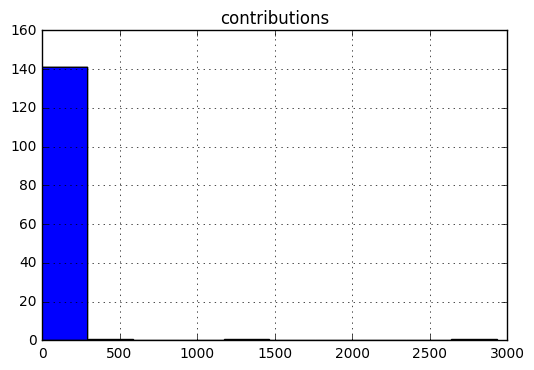

In [525]:
unique_contributors.hist()

### Contributions rankings

In [561]:
def rank_by_contributors(table, field):
    grouped = table.groupby(field, as_index=False)
    summed = grouped.login.count()
    summed.columns = [field, 'count']
    return summed

In [562]:
def rank_by_contributions(table, field):
    grouped = table.groupby(field, as_index=False)
    return grouped.contributions.sum()

In [564]:
def create_ranking(table, field):
    count = rank_by_contributors(table, field)
    summed = rank_by_contributions(table, field)
    return count.merge(summed).sort_values("contributions", ascending=False)

#### Top repositories 

In [566]:
create_ranking(table, 'repo').head(20)

,repo,count,contributions
8,django-calaccess-raw-data,132,2391
0,california-civic-data-coalition.github.io,7,806
1,django-calaccess-campaign-browser,18,731
4,django-calaccess-downloads-website,7,718
6,django-calaccess-processed-data,3,288
9,django-calaccess-technical-documentation,5,229
10,django-postgres-copy,3,101
11,python-calaccess-notebooks,2,62
2,django-calaccess-cookbook,1,30
3,django-calaccess-docker,1,29


#### Top names

In [567]:
create_ranking(unique_contributors, 'name').head(20)

,name,count,contributions
19,Ben Welsh,1,2932
59,James Gordon,1,1329
1,Aaron Williams,1,379
116,Sahil Chinoy,1,126
2,Agustin Armendariz,1,69
21,Bill Chambers,1,47
14,Anthony Pesce,1,40
25,Casey Miller,1,33
71,Juan Elosua,1,29
0,,13,29


#### Top companies

In [568]:
create_ranking(unique_contributors, 'company').head(20)

,company,count,contributions
43,Los Angeles Times,16,3016
15,California Civic Data Coalition,1,1329
79,Washington Post,3,387
70,UC Berkeley,1,126
50,New York Times,4,73
0,,15,55
45,Mozilla OpenNews,7,47
23,Databricks,1,47
77,Vox Media,2,36
47,NPR,1,29


#### Top locations 

In [569]:
create_ranking(unique_contributors, 'location').head(20)

,location,count,contributions
26,"Los Angeles, CA",19,3023
12,"Columbia, MO",3,1331
48,"Washington, DC",15,428
5,"Berkeley, CA",4,176
29,"New York, NY",19,167
11,"Chicago, IL",6,31
8,"Buenos Aires, Argentina",5,30
0,,14,30
38,"San Francisco, CA",8,27
37,"San Diego, CA",1,20


### Contributions from inside coalition vs. outside of coalition

In [531]:
login_list = [
    'palewire',
    'gordonje',
    'sahilchinoy',
    'aboutaaron',
    'armendariz',
    'cephillips',
    'jlagetz'
]
unique_contributors['in_coalition'] = unique_contributors.login.isin(login_list)

In [532]:
coalition_table = unique_contributors.groupby('in_coalition').size().reset_index()
coalition_table.columns = ['in_coalition', 'count']

In [533]:
coalition_table['count_percent'] = coalition_table['count'] / total_contributors

In [534]:
coalition_table = coalition_table.merge(unique_contributors.groupby('in_coalition').contributions.sum().reset_index())

In [535]:
coalition_table['contributions_percent'] = coalition_table['contributions'] / total_contributions

In [536]:
coalition_table.sort_values("in_coalition", ascending=False)

,in_coalition,count,count_percent,contributions,contributions_percent
1,True,7,0.048611,4847,0.894941
0,False,137,0.951389,569,0.105059


### California v. everybody

In [537]:
unique_contributors['in_california'] = False
unique_contributors.loc[unique_contributors.location.str.endswith(", CA"), 'in_california'] = True

In [538]:
california_table = unique_contributors.groupby('in_california').size().reset_index()
california_table.columns = ['in_california', 'count']

In [539]:
california_table['count_percent'] = california_table['count'] / total_contributors

In [540]:
california_table = california_table.merge(unique_contributors.groupby('in_california').contributions.sum().reset_index())

In [541]:
california_table['contributions_percent'] = california_table['contributions'] / total_contributions

In [542]:
california_table.sort_values("in_california", ascending=False)

,in_california,count,count_percent,contributions,contributions_percent
1,True,41,0.284722,3271,0.603951
0,False,103,0.715278,2145,0.396049


## Output data

In [543]:
unique_contributors.to_csv("./output/unique-contributors.csv")